# OffensiveEval NB initial work
So the work im gonna do in this notebook is just exploritory and is mostly about getting to grips with the data set and juypyter

So the things im going to try and do in this notebook:
* load in the dataset
* turn the dataset into a document term matrix (dtm)
* train a naive bayes model and evaluate results

After i get these things done i'll try to:
* test out some other models
* experiment with basic tuning for models and vectorizer
* get some graphs into the notebook to compare models
* explore how models work more to understand how to make more accurate

## Part 1

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd


In [2]:
path = 'data/olid-training-v2.0.tsv'
testset = pd.read_table(path, header=None, names=['id','tweet','sub_a','sub_b','sub_c'])
path = 'data/testset-levela_noheader.tsv'
testseta = pd.read_table(path, header=None, names=['id','tweet'])
labelsa = pd.read_csv('data/labels-levela.csv',header=None, names=['id','sub_a'])

In [3]:
testset.head(5)

,id,tweet,sub_a,sub_b,sub_c
0,86426,@USER She should ask a few native Americans wh...,OFF,UNT,NaN
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,TIN,IND
2,16820,Amazon is investigating Chinese employees who ...,NOT,NaN,NaN
3,62688,"@USER Someone should'veTaken"" this piece of sh...",OFF,UNT,NaN
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,NaN,NaN


In [4]:
testset.sub_a.value_counts()

NOT    8840
OFF    4400
Name: sub_a, dtype: int64

In [5]:
testset['label_a_num'] = testset.sub_a.map({'NOT':0, 'OFF':1})

In [6]:
labelsa

,id,sub_a
0,15923,OFF
1,27014,NOT
2,30530,NOT
3,13876,NOT
4,60133,OFF
...,...,...
855,73439,OFF
856,25657,NOT
857,67018,OFF
858,50665,NOT


In [7]:
labelsa['label_a_num'] = labelsa.sub_a.map({'NOT':0, 'OFF':1})

In [8]:
labelsa

,id,sub_a,label_a_num
0,15923,OFF,1
1,27014,NOT,0
2,30530,NOT,0
3,13876,NOT,0
4,60133,OFF,1
...,...,...,...
855,73439,OFF,1
856,25657,NOT,0
857,67018,OFF,1
858,50665,NOT,0


In [9]:
testset.head(10)

,id,tweet,sub_a,sub_b,sub_c,label_a_num
0,86426,@USER She should ask a few native Americans wh...,OFF,UNT,NaN,1
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,TIN,IND,1
2,16820,Amazon is investigating Chinese employees who ...,NOT,NaN,NaN,0
3,62688,"@USER Someone should'veTaken"" this piece of sh...",OFF,UNT,NaN,1
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,NaN,NaN,0
5,97670,@USER Liberals are all Kookoo !!!,OFF,TIN,OTH,1
6,77444,@USER @USER Oh noes! Tough shit.,OFF,UNT,NaN,1
7,52415,@USER was literally just talking about this lo...,OFF,TIN,GRP,1
8,45157,@USER Buy more icecream!!!,NOT,NaN,NaN,0
9,13384,@USER Canada doesn’t need another CUCK! We alr...,OFF,TIN,IND,1


In [10]:
x = testset.tweet
y = testset.label_a_num
print(x.shape)
print(y.shape)

(13240,)
(13240,)


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=1)

In [13]:
# print(x_train.shape)
# print(x_test.shape)
# print(y_train.shape)
# print(y_test.shape)


In [14]:
x_test = testseta.tweet
y_test = labelsa.label_a_num

In [15]:
vect = CountVectorizer(stop_words='english', ngram_range=(1, 2), min_df=2)

In [16]:
x_train_dtm = vect.fit_transform(x)

In [17]:
x_train_dtm

<13240x17746 sparse matrix of type '<class 'numpy.int64'>'
	with 165863 stored elements in Compressed Sparse Row format>

In [18]:
x_test_dtm = vect.transform(x_test)
x_test_dtm

<860x17746 sparse matrix of type '<class 'numpy.int64'>'
	with 9972 stored elements in Compressed Sparse Row format>

In [19]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [20]:
obj_nb = %timeit -o nb.fit(x_train_dtm, y)

2.39 ms ± 15.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [21]:
y_pred_class = nb.predict(x_test_dtm)

In [22]:
from sklearn import metrics
nb_acc = metrics.accuracy_score(y_test, y_pred_class)
nb_acc

0.7732558139534884

In [23]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[512, 108],
       [ 87, 153]], dtype=int64)

In [24]:
x_test[(y_pred_class==1) & (y_test==0)]

6      #RAP is a form of ART! Used to express yoursel...
11     𝓒-𝓒𝓮𝓭𝓻𝓪𝓷..  The Nord cannot make a single move...
12       #ConsTOO THE PLACE FOR FED UP CONSERVATIVES !!!
18     #Dallas#Policewoman kills neighbor in HIS own ...
23     #SilsilaBadallteRishtonKa tag is filled with a...
                             ...                        
806    @USER I see your point but the school shooting...
809    @USER @USER I agree with you. Read the first p...
815    #LifeIsButepu when your friends dont know you ...
837    @USER Laws are for the law abiding citizens. W...
858    #WednesdayWisdom Antifa calls the right fascis...
Name: tweet, Length: 108, dtype: object

In [25]:
x_test[(y_pred_class==0) & (y_test==1)]

4      #NoPasaran: Unity demo to oppose the far-right...
7      @USER Do you get the feeling he is kissing @US...
30     #ChristineBlaseyFord is your #Kavanaugh accuse...
43     @USER @USER @USER @USER @USER @USER @USER @USE...
61     #Antifa: Take note of how to protest with civi...
                             ...                        
786    #EuropaLeague Song the EU, cash your remaining...
800    #Kavanaugh The moment #BlaseyFord is exposed a...
810    #BCOG @USER she is cool, confident, cocky, and...
826    #auspol  I don't know why he is still in his j...
834    @USER @USER @USER @USER Beats the hell NJ out ...
Name: tweet, Length: 87, dtype: object

In [64]:
y_pred_prob = nb.predict_proba(x_test_dtm)[:,1]

In [27]:
metrics.roc_auc_score(y_test, y_pred_prob)

0.7935853494623655

# Part 2
Okay so i got the notebook working well and also was able to use the data set and naive bayes.

Now im gonna try some other models so i can compare them, after that might try and look into why the accuracy was so low for NB

In [28]:
from sklearn.linear_model  import LogisticRegression, SGDClassifier
logreg = LogisticRegression(max_iter=10000)
sgdc = SGDClassifier()

In [29]:
obj_log = %timeit -o logreg.fit(x_train_dtm, y)

1.04 s ± 20.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [30]:
y_pred_class = logreg.predict(x_test_dtm)

In [31]:
y_pred_prob = logreg.predict_proba(x_test_dtm)[:,1]

In [32]:
log_acc = metrics.accuracy_score(y_test, y_pred_class)

In [33]:
metrics.roc_auc_score(y_test, y_pred_prob)

0.797557123655914

In [34]:
obj_SVM = %timeit -o sgdc.fit(x_train_dtm, y)

55.2 ms ± 2.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [35]:
y_pred_class = sgdc.predict(x_test_dtm)
svm_acc = metrics.accuracy_score(y_test,y_pred_class)

In [36]:
x_train_tokens = vect.get_feature_names()
len(x_train_tokens)

17746

In [37]:
print(x_train_tokens[0:50])

['00', '000', '05', '08', '08 12', '08 18', '09', '09 08', '09 14', '10', '10 20', '10 century', '10 cities', '10 mile', '10 million', '10 signs', '10 years', '100', '100 agree', '100 correct', '100 percent', '100 right', '1000', '100s', '101', '102', '10th', '10x', '10yrs', '11', '11 year', '110', '11th', '11th hour', '12', '12 gauge', '13', '13 killers', '1300', '1300 pump', '14', '14 23', '14th', '15', '15 concert', '15 fully', '15 min', '15 minutes', '15 year', '15 years']


In [38]:
print(x_train_tokens[-50:])

['youll', 'young', 'young age', 'young conservatives', 'young dumb', 'young fascists', 'young lady', 'young man', 'young men', 'young minds', 'young people', 'young woman', 'younger', 'youre', 'youth', 'youth activists', 'youth invasion', 'youthful', 'youtube', 'youtube url', 'youtuber', 'youuuu', 'yr', 'yr old', 'yrs', 'yrs ago', 'yrs later', 'yuge', 'yup', 'zealand', 'zealots', 'zero', 'zero accomplishments', 'zero credibility', 'zero evidence', 'zim', 'zimmerman', 'zionists', 'zoe', 'zombie', 'zombie url', 'zone', 'zones', 'zones don', 'zuckerberg', '너의존재가_기적이야', '너의존재가_기적이야 url', '현재', '현재 gt', '현재 ll']


In [39]:
nb.feature_count_

array([[2., 3., 1., ..., 5., 2., 2.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [40]:
nb.feature_count_.shape

(2, 17746)

In [41]:
OFF_token_count = nb.feature_count_[1,:]
OFF_token_count

array([0., 0., 1., ..., 0., 0., 0.])

In [42]:
NOT_token_count = nb.feature_count_[0,:]
NOT_token_count

array([2., 3., 1., ..., 5., 2., 2.])

In [43]:
tokens = pd.DataFrame({'token':x_train_tokens, 'OFF':OFF_token_count, 'NOT':NOT_token_count})
tokens.head(10)

,token,OFF,NOT
0,00,0.0,2.0
1,000,0.0,3.0
2,05,1.0,1.0
3,08,0.0,6.0
4,08 12,0.0,2.0
5,08 18,0.0,2.0
6,09,1.0,4.0
7,09 08,0.0,2.0
8,09 14,0.0,2.0
9,10,15.0,45.0


In [44]:
tokens.sample(15, random_state=8)

,token,OFF,NOT
5598,fun,18.0,29.0
4637,echo,1.0,1.0
11116,popped,3.0,0.0
2045,bts,0.0,4.0
3079,content,0.0,8.0
4879,european,3.0,6.0
1927,brain knows,2.0,0.0
7870,know moral,1.0,2.0
5108,family think,1.0,1.0
15574,user cost,0.0,2.0


In [45]:
nb.class_count_

array([8840., 4400.])

In [46]:
tokens['OFF'] = tokens.OFF + 1
tokens['NOT'] = tokens.NOT + 1

In [47]:
tokens['OFF'] = tokens.OFF /nb.class_count_[1]
tokens['NOT'] = tokens.NOT / nb.class_count_[0]
tokens.sample(15, random_state=8)

,token,OFF,NOT
5598,fun,0.004318,0.003394
4637,echo,0.000455,0.000226
11116,popped,0.000909,0.000113
2045,bts,0.000227,0.000566
3079,content,0.000227,0.001018
4879,european,0.000909,0.000792
1927,brain knows,0.000682,0.000113
7870,know moral,0.000455,0.000339
5108,family think,0.000455,0.000226
15574,user cost,0.000227,0.000339


In [48]:
tokens['OFF_ratio'] = tokens.OFF /tokens.NOT
tokens.sample(15, random_state=40)

,token,OFF,NOT,OFF_ratio
174,39,0.000227,0.000452,0.502273
10262,oh right,0.000455,0.000452,1.004545
7754,kidding,0.000682,0.001471,0.463636
5008,extra 2bn,0.000227,0.000339,0.669697
4689,electoral college,0.000455,0.000226,2.009091
12645,schooling,0.000455,0.000339,1.339394
5953,good new,0.000227,0.000339,0.669697
11598,pussy,0.005227,0.000566,9.241818
10836,perpetrated,0.000227,0.000339,0.669697
10321,ont,0.000227,0.000339,0.669697


In [49]:
tokens.sort_values('OFF_ratio', ascending=False)

,token,OFF,NOT,OFF_ratio
1702,bitch,0.022500,0.000339,66.300000
15413,user bitch,0.005682,0.000113,50.227273
6939,idiot,0.012727,0.000339,37.503030
15776,user fuck,0.014545,0.000452,32.145455
5550,fuck,0.038636,0.001697,22.769697
...,...,...,...,...
15393,user beautiful,0.000455,0.003167,0.143506
1975,brexit,0.000909,0.006787,0.133939
2944,conservatives conservatives,0.000227,0.001810,0.125568
3024,conservatives url,0.000227,0.002828,0.080364


In [50]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

<function matplotlib.pyplot.show(close=None, block=None)>

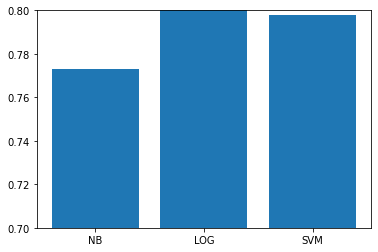

In [51]:
plt.bar(['NB','LOG','SVM'],[nb_acc,log_acc,svm_acc])
plt.ylim(0.7, 0.85)
plt.show

In [52]:
%who

CountVectorizer	 LogisticRegression	 MultinomialNB	 NOT_token_count	 OFF_token_count	 SGDClassifier	 labelsa	 log_acc	 logreg	 
matplotlib	 metrics	 nb	 nb_acc	 obj_SVM	 obj_log	 obj_nb	 path	 pd	 
plt	 sgdc	 svm_acc	 testset	 testseta	 tokens	 train_test_split	 vect	 x	 
x_test	 x_test_dtm	 x_train_dtm	 x_train_tokens	 y	 y_pred_class	 y_pred_prob	 y_test	 


In [53]:
obj_nb

<TimeitResult : 2.39 ms ± 15.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)>

In [54]:
obj_log

<TimeitResult : 1.04 s ± 20.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>

In [55]:
obj_SVM

<TimeitResult : 55.2 ms ± 2.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)>

In [56]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [57]:
GBC = GradientBoostingClassifier()
rfc = RandomForestClassifier()

In [58]:
obj_GBC = %timeit -o GBC.fit(x_train_dtm, y)

1.89 s ± 23.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [59]:
y_pred_class = GBC.predict(x_test_dtm)
GBC_acc = metrics.accuracy_score(y_test,y_pred_class)

In [60]:
obj_rfc = %timeit -o rfc.fit(x_train_dtm, y)
y_pred_class = rfc.predict(x_test_dtm)
rfc_acc = metrics.accuracy_score(y_test,y_pred_class)

14.5 s ± 86.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<function matplotlib.pyplot.show(close=None, block=None)>

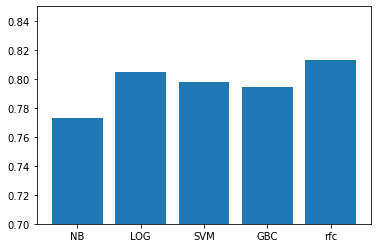

In [63]:
plt.bar(['NB','LOG','SVM','GBC','rfc'],[nb_acc,log_acc,svm_acc,GBC_acc,rfc_acc])
plt.ylim(0.7, 0.85)
plt.show